In [1]:
!pip install pandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import cartopy.crs
%matplotlib inline

In [36]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
#NSB model sites
NSB = os.listdir('./Data')
NSB_files = glob.glob('./Data/*.csv')
NSB_list = []
for file_name in NSB_files:
    A = pd.read_csv(file_name, sep=',')
    NSB_list.append(A)

In [28]:
#digitised models (non-NSB)
digi = os.listdir('./digitised models')
digi_files = glob.glob('./digitised models/*.csv')
digi_list = []
for file_name in digi_files:
    B = pd.read_csv(file_name, sep=',')
    digi_list.append(B)

In [5]:
#Jones
Jones=os.listdir('./Jones')
Jones_folder = np.sort(glob.glob('./Jones/*.txt'))
Jones_list = []
for file_name in Jones_folder:
    C = pd.read_csv(file_name,  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
    Jones_list.append(C)

In [63]:
#Australia north west shelf
NWS=os.listdir('./NWS_data')
NWS_folder = np.sort(glob.glob('./NWS_data/*.txt'))
NWS_list = []
for file_name in NWS_folder:
    D = pd.read_csv(file_name,  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
    NWS_list.append(D)

In [145]:
#great australian bight
GAB = os.listdir('./GAB')
GAB_files = glob.glob('./GAB/*.txt')
GAB_list = []
for file_name in GAB_files:
    E = pd.read_csv(file_name, comment='C', names=['Age', 'Depth'], delim_whitespace=True, skiprows=18, usecols=[0,1])
    GAB_list.append(E)

In [119]:
#US east coast
US = os.listdir('./US_East_coast')
US_files = glob.glob('./US_East_coast/*.txt')
US_list = []
for file_name in US_files:
    F = pd.read_csv(file_name, comment='C', names=['Age', 'Depth'], delim_whitespace=True, skiprows=18, usecols=[0,1])
    US_list.append(F)

In [121]:
#print(NWS_list)
#print(GAB_list)
#print(US_list)

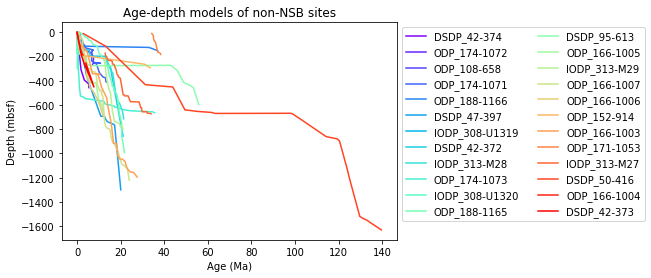

In [64]:
#plotting digitised 

#colour map
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(digi_files))-1)

timestep=np.arange(0,len(digi_files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

#just name of site
digi_names= [x[:-10] for x in digi]

#plot
for i in np.arange(0,len(digi_list),1):
    plt.plot(digi_list[i]['Age (Ma)'], digi_list[i]['Depth (mbsf)']*-1, label=digi_names[i], c=c[i])
    
plt.ylabel('Depth (mbsf)')
plt.xlabel('Age (Ma)')
plt.title('Digitised Age-depth models of non-NSB sites')
plt.legend(bbox_to_anchor=(1,1),ncol=2)

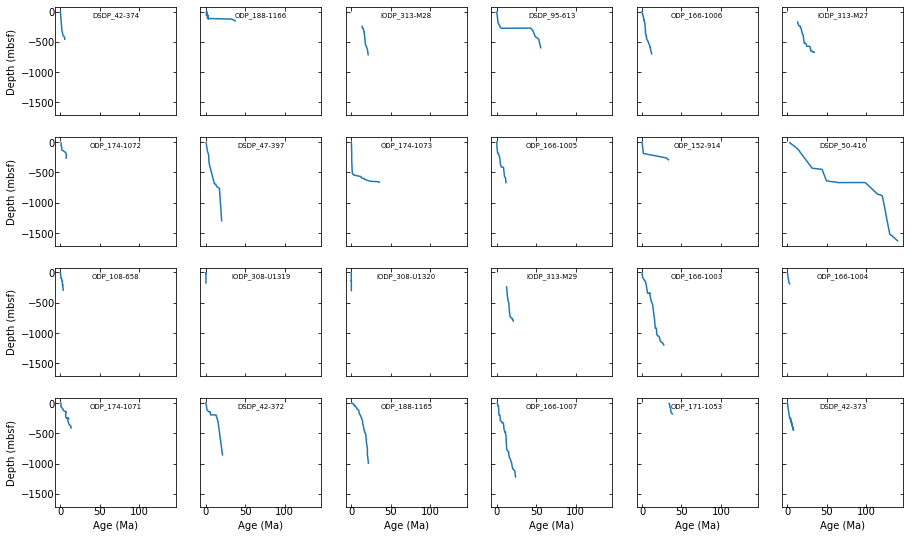

In [30]:
nrows=4
ncols=6
fs=7

files=np.sort(os.listdir('./digitised models'))
#names=

fig, axs = plt.subplots(nrows,ncols, figsize=(38/2.5, 23/2.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in np.arange(0,nrows*ncols,nrows): #  this controls that the file number gets loaded in multiples of nrows
    for f in np.arange(0,nrows,1):#This controls the row number 
            ax = axs[f,int(i/nrows)] 
            #ax.set_xlim(0,150)
            #ax.set_ylim(-1600,0)
            #print(f+i)
            
            ax.plot(digi_list[f+i]['Age (Ma)'], digi_list[f+i]['Depth (mbsf)']*-1, label=digi_names[f+i])
            
            ax.tick_params(axis='both', which='both', direction='in', labelbottom=True, pad=0.1, top=True, right=True)
            ax.set_title(str(digi_names[f+i]), pad=-10, fontsize=fs)
            ax.set_ylabel('Depth (mbsf)')
            ax.set_xlabel('Age (Ma)')    
for ax in axs.flat:
    ax.label_outer()

In [31]:
#loading in ranking location summaries
rank1 = pd.read_csv('./ranking location summaries/rank1.csv')
rank2 = pd.read_csv('./ranking location summaries/rank2.csv')
rank3 = pd.read_csv('./ranking location summaries/rank3.csv')

In [32]:
lats1=rank1['Lat']
longs1=rank1['Long']
name1=rank1['Name']

lats2=rank2['Lat']
longs2=rank2['Long']
name2=rank2['Name']

lats3=rank3['Lat']
longs3=rank3['Long']
name3=rank3['Name']

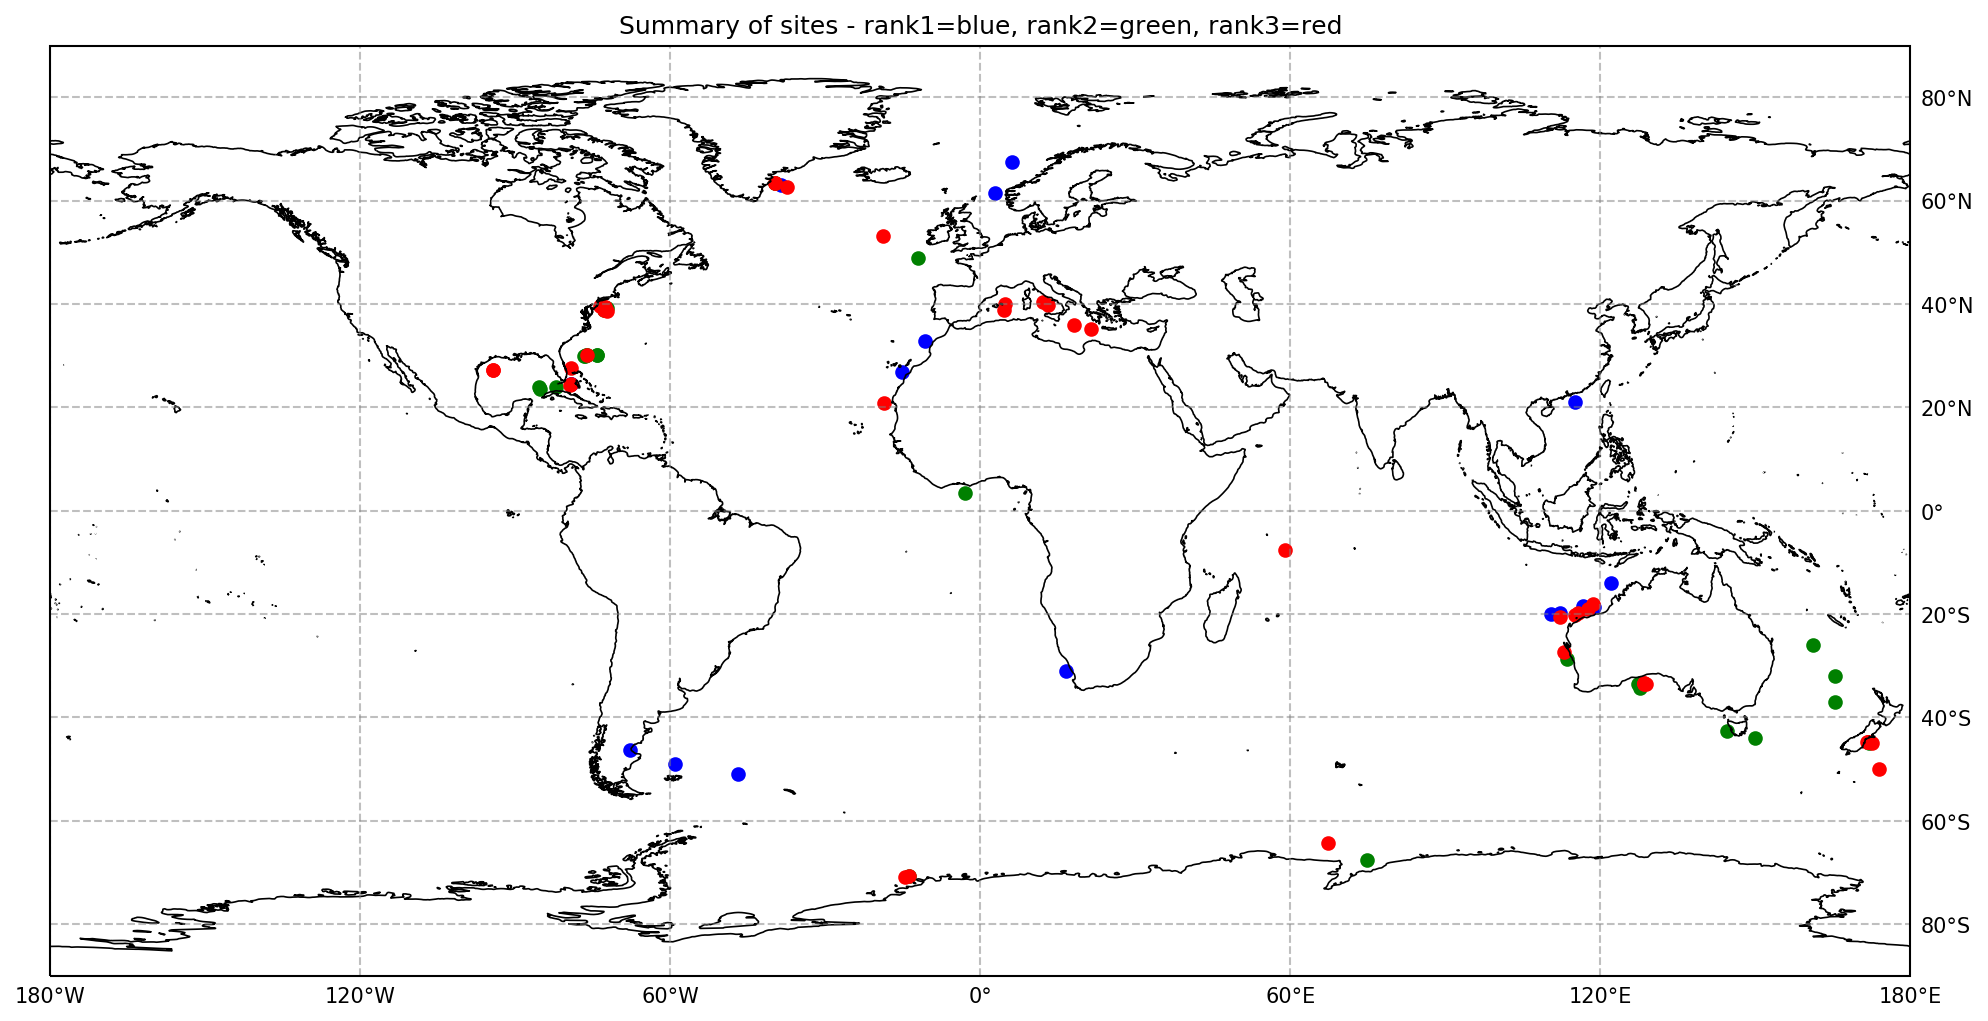

In [42]:
#location of all data coloured by rank
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=cartopy.crs.PlateCarree())
#Robinson looks nice (curved)
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img() #for coloured map
#ax.gridlines()#draw_labels=True for gridline labels on supported projections above

#data into map
#rank1
mapscat=ax.scatter(longs1,lats1,marker="o",color=['blue'],transform=cartopy.crs.PlateCarree(),label=name1)
#rank2
mapscat=ax.scatter(longs2,lats2,marker="o",color=['green'],transform=cartopy.crs.PlateCarree(),label=name2)
#rank3
mapscat=ax.scatter(longs3,lats3,marker="o",color=['red'],transform=cartopy.crs.PlateCarree(),label=name3)

plt.title('Summary of sites - rank1=blue, rank2=green, rank3=red')

#grid lines and labels
gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()

In [44]:
#More data for ranked age-depth plots
#collected data ranked
#rank1
R1 = os.listdir('./collected data age-depth ranking/rank1')
R1_files = glob.glob('./collected data age-depth ranking/rank1/*.csv')
R1_list = []
for file_name in R1_files:
    G = pd.read_csv(file_name, sep=',')
    R1_list.append(G)

In [45]:
#rank2
R2 = os.listdir('./collected data age-depth ranking/rank2')
R2_files = glob.glob('./collected data age-depth ranking/rank2/*.csv')
R2_list = []
for file_name in R2_files:
    H = pd.read_csv(file_name, sep=',')
    R2_list.append(H)

In [46]:
#rank3
R3 = os.listdir('./collected data age-depth ranking/rank3')
R3_files = glob.glob('./collected data age-depth ranking/rank3/*.csv')
R3_list = []
for file_name in R3_files:
    I = pd.read_csv(file_name, sep=',')
    R3_list.append(I)

In [62]:
#3 best from NWS nthscott
delambre=pd.read_csv('./NWS_data/delambre1.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
phoenix=pd.read_csv('./NWS_data/phoenix1.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
nthscott=pd.read_csv('./NWS_data/nthscott.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])


In [49]:
#print(R1_list)
#print(R2_list)
#print(R3_list)

In [85]:
#colour map for collected               
cmap = plt.get_cmap('cool')
norm = mcolors.Normalize(vmin=0, vmax=(len(R1_files))-1)

timestep=np.arange(0,len(R1_files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c2=cmap(norm(timestep))

In [86]:
#colour map for Jones
cmap = plt.get_cmap('Wistia')
norm = mcolors.Normalize(vmin=0, vmax=(len(Jones_folder))-1)

timestep=np.arange(0,len(Jones_folder),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c3=cmap(norm(timestep))

In [87]:
#colour map for 3 NWS
cmap = plt.get_cmap('winter')
norm = mcolors.Normalize(vmin=0, vmax=2)

timestep=np.arange(0,3,1)
def get_colour(timestep):
    return cmap(norm(timestep))
c4=cmap(norm(timestep))

In [95]:
#trimed site names
R1_names= [x[:-10] for x in R1]
R2_names= [x[:-10] for x in R2]
R3_names= [x[:-10] for x in R3]

Jones_names= [x[:-4] for x in Jones]

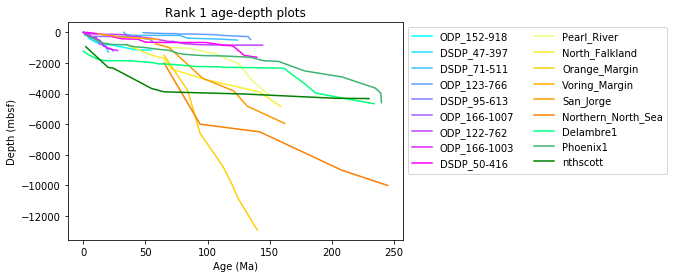

In [97]:
#plotting rank1

#plot collected rank1
for i in np.arange(0,len(R1_list),1):
    plt.plot(R1_list[i]['Age (Ma)'], R1_list[i]['Depth (mbsf)']*-1, label=R1_names[i], c=c2[i])
    
#plot jones
for i in np.arange(0,len(Jones_list),1):
    plt.plot(Jones_list[i]['bottom_age'], Jones_list[i]['bottom_depth']*-1, label=Jones_names[i], c=c3[i])

#plot 3 NWS
plt.plot(delambre.bottom_age, delambre.bottom_depth*-1, label='Delambre1',c='springgreen')
plt.plot(phoenix.bottom_age, phoenix.bottom_depth*-1, label='Phoenix1',c='mediumseagreen') 
plt.plot(nthscott.bottom_age, nthscott.bottom_depth*-1, label='nthscott',c='green') 
    
    
    
plt.ylabel('Depth (mbsf)')
plt.xlabel('Age (Ma)')
plt.title('Rank 1 age-depth plots')
plt.legend(bbox_to_anchor=(1,1),ncol=2)

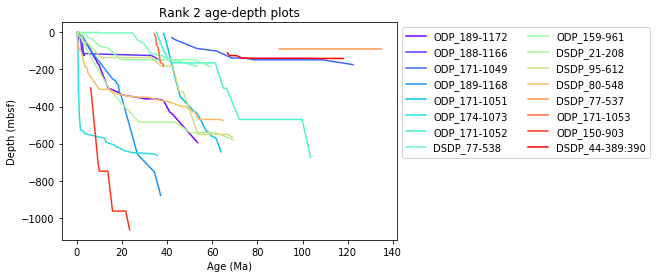

In [99]:
#plotting rank2

#colour map
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(R2_list))-1)

timestep=np.arange(0,len(R2_list),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c5=cmap(norm(timestep))

#plot collected rank2
for i in np.arange(0,len(R2_list),1):
    plt.plot(R2_list[i]['Age (Ma)'], R2_list[i]['Depth (mbsf)']*-1, label=R2_names[i], c=c5[i])
        
plt.ylabel('Depth (mbsf)')
plt.xlabel('Age (Ma)')
plt.title('Rank 2 age-depth plots')
plt.legend(bbox_to_anchor=(1,1),ncol=2)

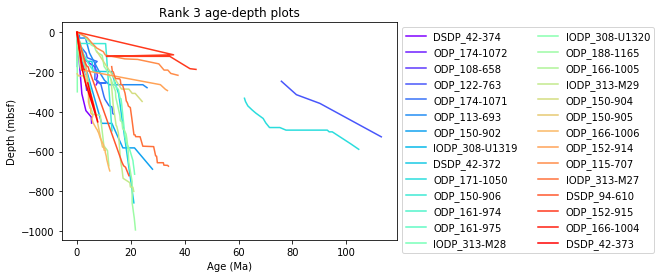

In [129]:
#plotting rank3

#colour map
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(R3_list))-1)

timestep=np.arange(0,len(R3_list),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c6=cmap(norm(timestep))

#plot collected rank2
for i in np.arange(0,len(R3_list),1):
    plt.plot(R3_list[i]['Age (Ma)'], R3_list[i]['Depth (mbsf)']*-1, label=R3_names[i], c=c6[i])
        
plt.ylabel('Depth (mbsf)')
plt.xlabel('Age (Ma)')
plt.title('Rank 3 age-depth plots')
plt.legend(bbox_to_anchor=(1,1),ncol=2)

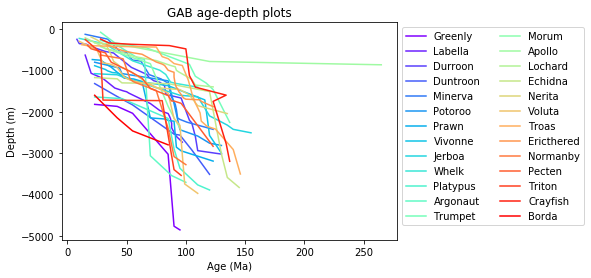

In [146]:
#plotting GAB

#colour map
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(GAB_list))-1)

timestep=np.arange(0,len(GAB_list),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c7=cmap(norm(timestep))

#name trimming
GAB_names= [x[:-4] for x in GAB[1:27]] #there was something going on with a checkpoint in GAB so the first entry was ignored

#plot collected rank2
for i in np.arange(0,len(GAB_list),1):
    plt.plot(GAB_list[i]['Age'], GAB_list[i]['Depth']*-1, label=GAB_names[i], c=c7[i])
        
plt.ylabel('Depth (m)')
plt.xlabel('Age (Ma)')
plt.title('GAB age-depth plots')
plt.legend(bbox_to_anchor=(1,1),ncol=2)

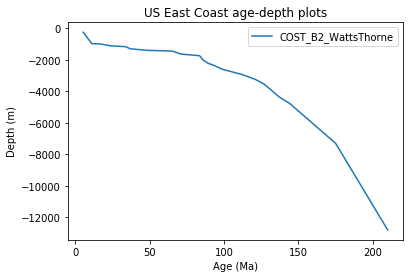

In [151]:
#plotting US east coast

#name trimming
US_names= [x[:-4] for x in US]

#plot collected rank2
for i in np.arange(0,len(US_list),1):
    plt.plot(US_list[i]['Age'], US_list[i]['Depth']*-1, label=US_names[i])
        
plt.ylabel('Depth (m)')
plt.xlabel('Age (Ma)')
plt.title('US East Coast age-depth plots')
plt.legend(bbox_to_anchor=(1,1),ncol=2)